In [ ]:
# Dataset link: https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import LeakyReLU 
import matplotlib.pyplot as plt

In [2]:
bs = 32
iz = 244

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/train",
    shuffle = True,
    seed = 16,
    image_size = (iz, iz),
    batch_size = bs
)

Found 20000 files belonging to 2 classes.


In [4]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/test",
    shuffle = True,
    seed = 16,
    image_size = (iz, iz),
    batch_size = bs
)

Found 5000 files belonging to 2 classes.


In [5]:
class_names = training_ds.class_names
class_names

['cats', 'dogs']

In [6]:
len(training_ds)

625

In [7]:
len(testing_ds)

157

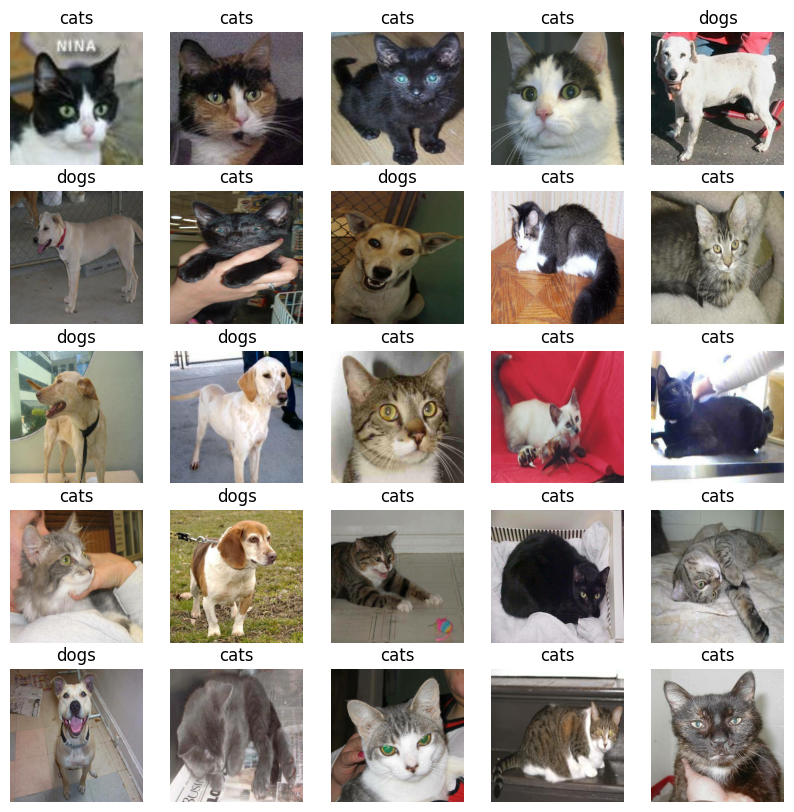

In [8]:
plt.figure(figsize = (10, 10))
for image_batch, lable_batch in training_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [9]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
# validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
resize_and_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])
#def process(image,label):
#    image = tf.cast(image/255. ,tf.float32)
#    return image,label

#training_ds = training_ds.map(process)
#testing_ds = testing_ds.map(process)



In [11]:
# model = models.Sequential([
#     resize_and_scale,
#     layers.Conv2D(32, kernel_size = (3,3), activation = LeakyReLU(alpha=0.1), input_shape=(64,256,256,3)),
# #     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size = (3,3), activation = LeakyReLU(alpha=0.1)),
# #     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128, kernel_size = (3,3), activation = LeakyReLU(alpha=0.1)),
# #     layers.BatchNormalization(),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),

#     layers.Dense(128, activation = LeakyReLU(alpha=0.1)),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation = LeakyReLU(alpha=0.1)),
#     layers.Dropout(0.3),
#     layers.Dense(32, activation = LeakyReLU(alpha=0.1)),
#     layers.Dropout(0.3),

#     layers.Dense(1, activation = 'sigmoid'),
# ])

# model.build(input_shape = (64, 256, 256, 3))
# #for images, labels in training_ds.take(1):
# #    _ = model(images)


# #model = Sequential()
# #model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(256,256,3)))
# #model.add(MaxPooling2D((2,2)))
# #model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# #model.add(MaxPooling2D((2,2)))
# #model.add(Flatten())
# #model.add(Dense(64, activation = 'relu'))
# #model.add(Dropout(0.3))
# #model.add(Dense(32, activation = 'relu'))
# #model.add(Dropout(0.3))
# #model.add(Dense(1, activation = 'sigmoid'))


In [12]:
model = models.Sequential([
    resize_and_scale,
    layers.Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape = (bs, iz, iz,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    layers.Conv2D(128, kernel_size = (3,3), activation = "relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=2),
    # layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    # layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(64, activation = "relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation = "sigmoid"),
])

model.build(input_shape = (bs, iz, iz,3))

In [13]:
# Use mixed precision
#policy = tf.keras.mixed_precision.Policy('mixed_float16')
#tf.keras.mixed_precision.set_global_policy(policy)

# Use LossScaleOptimizer
#optimizer = tf.keras.mixed_precision.LossScaleOptimizer(tf.keras.optimizers.Adam())

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 batch_normalization (BatchN  (32, 254, 254, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (32, 125, 125, 64)      

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    training_ds,
    batch_size = bs,
    validation_data = testing_ds,
    epochs = 10,
)

Epoch 1/10
625/625 [==============================] - 206s 214ms/step - loss: 1.6591 - accuracy: 0.5465 - val_loss: 0.6613 - val_accuracy: 0.6026
Epoch 2/10
625/625 [==============================] - 121s 194ms/step - loss: 0.6561 - accuracy: 0.6129 - val_loss: 0.6163 - val_accuracy: 0.6684
Epoch 3/10
625/625 [==============================] - 140s 224ms/step - loss: 0.6312 - accuracy: 0.6581 - val_loss: 0.6199 - val_accuracy: 0.6626
Epoch 4/10
625/625 [==============================] - 140s 224ms/step - loss: 0.5800 - accuracy: 0.6942 - val_loss: 0.5674 - val_accuracy: 0.7206
Epoch 5/10
625/625 [==============================] - 137s 219ms/step - loss: 0.5139 - accuracy: 0.7402 - val_loss: 0.4886 - val_accuracy: 0.7678
Epoch 6/10
625/625 [==============================] - 142s 227ms/step - loss: 0.4802 - accuracy: 0.7597 - val_loss: 0.4951 - val_accuracy: 0.7514
Epoch 7/10
625/625 [==============================] - 138s 221ms/step - loss: 0.4490 - accuracy: 0.7858 - val_loss: 0.4785 -

In [17]:
# scores = model.evaluate(test_test_ds)

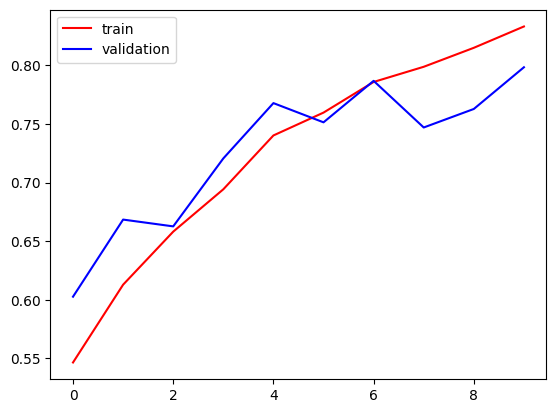

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

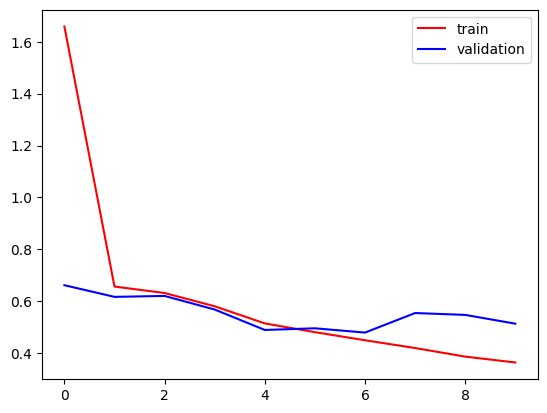

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
import cv2

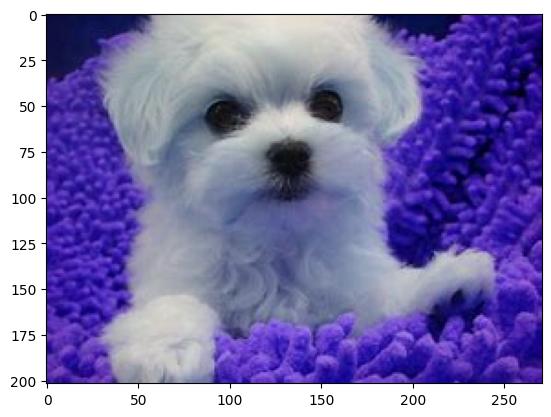

In [21]:
test_img = cv2.imread('./dogs_vs_cats/test_test/OIP (2).jpeg')
plt.imshow(test_img)

In [22]:
test_img.shape

(202, 271, 3)

In [23]:
test_img = cv2.resize(test_img,(iz,iz))
test_input = test_img.reshape((1,iz,iz,3))

In [24]:
threshold = 0.5
predictions = model.predict(test_input)
binary_predictions = (predictions > threshold).astype(int)
binary_predictions

1/1 [==============================] - 1s 734ms/step


array([[1]])

In [25]:
test_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dogs_vs_cats/test_test_test",
    shuffle = False,
#     seed = 16,
    image_size = (iz,iz),
    batch_size = bs
)

Found 6 files belonging to 2 classes.


In [26]:
predictions = model.predict(test_test_ds)

1/1 [==============================] - 0s 450ms/step


In [27]:
scores = model.evaluate(test_test_ds)
scores

1/1 [==============================] - 0s 192ms/step - loss: 0.0784 - accuracy: 1.0000


[0.07836082577705383, 1.0]

In [28]:
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)
binary_predictions

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1]])

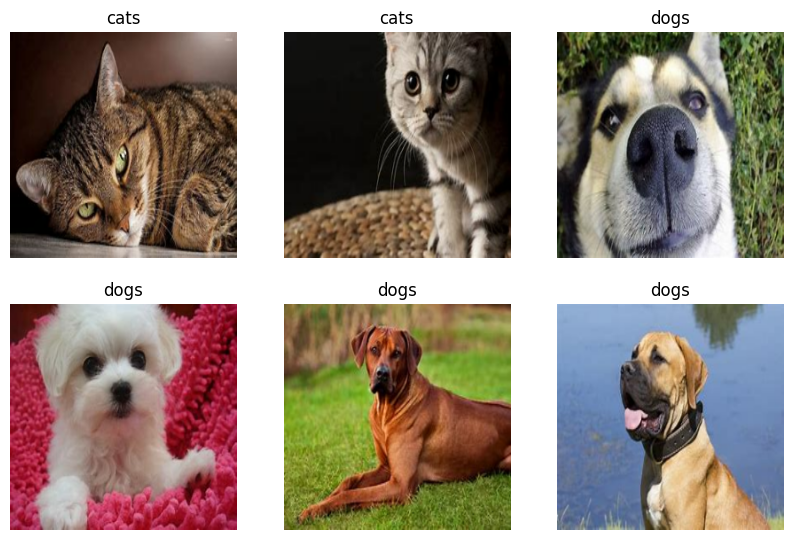

In [29]:
plt.figure(figsize = (10, 10))
for image_batch, lable_batch in test_test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

1/1 [==============================] - 0s 47ms/step


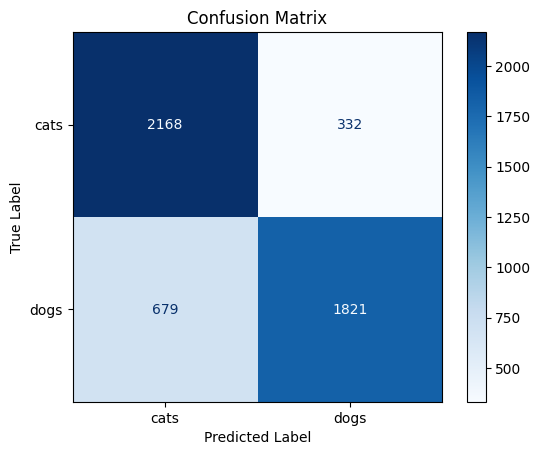

In [31]:
# Assuming you have model predictions and true labels in binary_predictions and true_labels variables respectively.
# binary_predictions and true_labels should be numpy arrays.
true_labels = []
binary_predictions = []

for images, labels in testing_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    binary_predictions.extend((predictions > 0.5).astype(int).flatten())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, binary_predictions)

# Plot the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [38]:
model.save(f"../Models/Version_1")

INFO:tensorflow:Assets written to: ../Models/Version_1\assets


INFO:tensorflow:Assets written to: ../Models/Version_1\assets


In [40]:
from tensorflow.keras.models import load_model

In [41]:
loaded_model = load_model("../Models/Version_1")

In [42]:
scores = loaded_model.evaluate(test_test_ds)
scores

1/1 [==============================] - 0s 366ms/step - loss: 0.0784 - accuracy: 1.0000


[0.07836082577705383, 1.0]